### IMPORT PACKAGES

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# from xgboost import XGBRegressor
import warnings

### READ DATASET

In [6]:
data = pd.read_csv("data/stud.csv")

In [7]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### In this case we will be predicting the math_score

In [8]:
X = data.drop(columns=["math_score"], axis = 1)

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y = data["math_score"]

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
for column in data.columns:
    if data[column].dtype == "O":
        print(f"Categores in {column} Variable: ", end= ' ')
        print(f"{data[column].unique()}")

Categores in gender Variable:  ['female' 'male']
Categores in race_ethnicity Variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categores in parental_level_of_education Variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categores in lunch Variable:  ['standard' 'free/reduced']
Categores in test_preparation_course Variable:  ['none' 'completed']


### Create Column transformer with 3 types of transformer
### Now we will be creating pipeline - for categorical features we need to perform one-hot encoding -> standard transform => it should be one after the other - in the form of pipeline

In [21]:
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

#Column Transformer is responsible for transforming columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, categorical_features),
        ("StandardScaler", numerical_transformer, numerical_features),
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [27]:
X.shape

(1000, 19)

#### 19 columns -> each catgory from each column and 2 numerical columns

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluate function to give metrics after model training

In [40]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual,  predicted))
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Trees": DecisionTreeRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose = False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = list()
r2_list = list()

for m in range(len(list(models))):
    model = list(models.values())[m]
    model.fit(X_train, y_train)

    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train, y_train_prediction)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test, y_test_prediction)

    print(list(models.keys())[m])
    model_list.append(list(models.keys())[m])

    print("Training Set Model Performance")
    print("\t Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("\t Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("\t R2 Score: {:.4f}".format(model_train_r2_score))

    print("-"*40)

    print("Testing Set Model Performance")
    print("\t Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("\t Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("\t R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)

    print("\n")
    print("*"*40)
    print("\n")

Linear Regression
Training Set Model Performance
	 Root Mean Square Error: 5.3293
	 Mean Absolute Error: 4.2715
	 R2 Score: 0.8740
----------------------------------------
Testing Set Model Performance
	 Root Mean Square Error: 5.4252
	 Mean Absolute Error: 4.2222
	 R2 Score: 0.8790


****************************************


Lasso
Training Set Model Performance
	 Root Mean Square Error: 6.5938
	 Mean Absolute Error: 5.2063
	 R2 Score: 0.8071
----------------------------------------
Testing Set Model Performance
	 Root Mean Square Error: 6.5197
	 Mean Absolute Error: 5.1579
	 R2 Score: 0.8253


****************************************


Ridge
Training Set Model Performance
	 Root Mean Square Error: 5.3233
	 Mean Absolute Error: 4.2650
	 R2 Score: 0.8743
----------------------------------------
Testing Set Model Performance
	 Root Mean Square Error: 5.3904
	 Mean Absolute Error: 4.2111
	 R2 Score: 0.8806


****************************************


K-Neighbors Regressor
Training Set Mo

### RESULTS

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Mode Names", "R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Mode Names,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,RandomForest Regressor,0.852587
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.848432
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Trees,0.736725


### RIDGE REGRESSION

In [49]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_predict = ridge_model.predict(X_test)
score = r2_score(y_test, y_predict)*100
print("Accuracy of the Model = %.2f" %score)

Accuracy of the Model = 88.06


### PLOT Y_PREDICT and Y_TEST

Text(0, 0.5, 'Predicted')

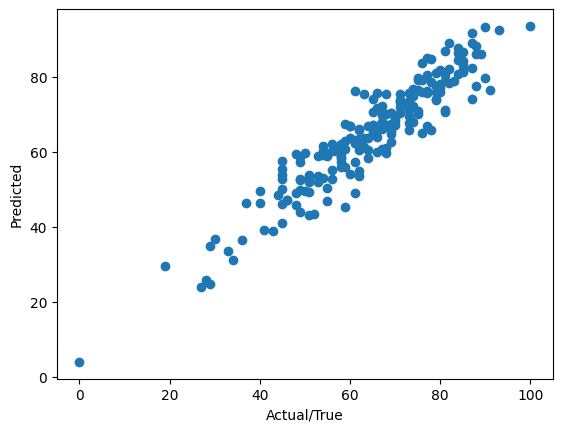

In [50]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual/True")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

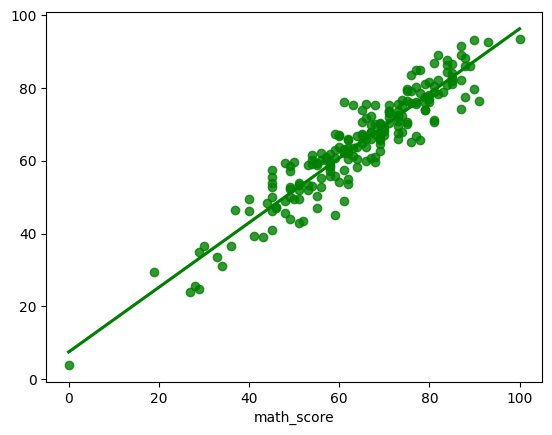

In [54]:
sns.regplot(x = y_test, y = y_predict, color = "green", ci = None)

### Difference between Actual/True Value and Predicted Value

In [55]:
predicted_dataframe = pd.DataFrame({"Actual/True Value": y_test, "Predicted Value": y_predict, "Difference": y_test-y_predict})

In [56]:
predicted_dataframe

,Actual/True Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
